### STA 4724: Homework 4 - Due Friday, Nov. 15 
**Instructions**: Finish the assignment by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Katelyn Choudhari             

**Your ID:** 5368756

## Question 1: Hierarchical Clustering
Use USArrests dataset and perform hierarchical clustering on the states.

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

**(a)** Read the dataset.

In [4]:
import pandas as pd

#read the dataset
arrests = pd.read_csv('USArrests.csv', index_col = 0)
print (arrests.head())

            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


**(b)** Using hierarchical clustering with Euclidean distance to cluster the states.

In [7]:
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

#calculates pairwise distances
X_dist = pdist(arrests, 'euclidean')

#does hiearchical clustering
X_link = linkage(arrests, method = 'ward')

#calculates cophenetic correlation
coph_cor, coph_dist = cophenet(X_link, X_dist)
print('Cophenetic correlation coefficient: ', coph_cor)

Cophenetic correlation coefficient:  0.7609612532256028


**(c)** Plot the dendrogram that shows the last 10 merged clusters.

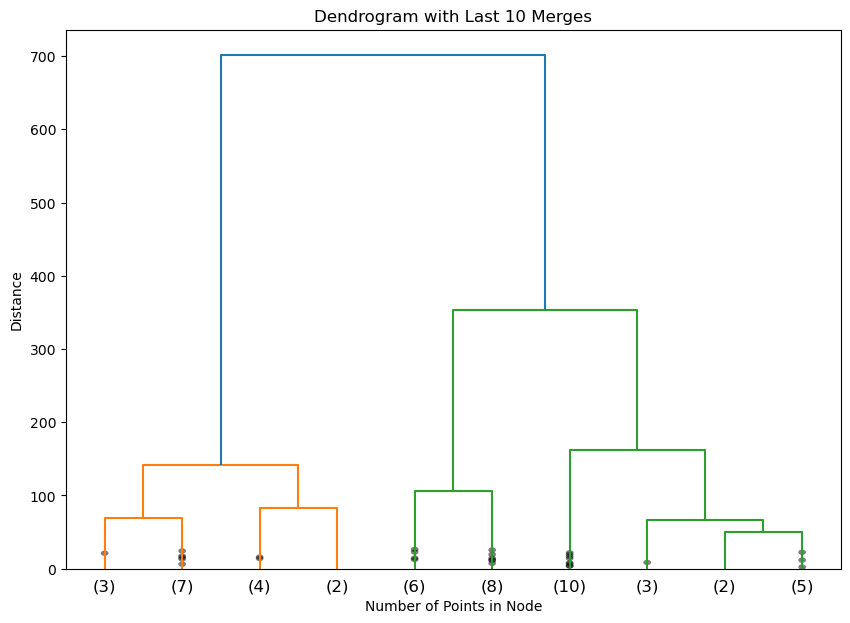

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize= (10,7))
dendrogram(X_link, truncate_mode = 'lastp', p = 10, show_contracted = True)
plt.title('Dendrogram with Last 10 Merges')
plt.xlabel('Number of Points in Node')
plt.ylabel('Distance')
plt.show()

**(d)** Cut the dendrogram at a height that results in three distinct clusters. Which states belong to each of the three clusters?

Code a program to show your answer.

In [13]:
from scipy.cluster.hierarchy import fcluster

#set based on the dendrogram
max_d = 350 #gets 3 clusters
#max_d = 450 will yield 1s and 2s

# form flat clusters
clusters = fcluster(X_link, max_d, criterion = 'distance')
print(clusters, '\n')

#map states to clusters
state_clusters = pd.DataFrame({'State': arrests.index, 'Cluster': clusters})
print(state_clusters.groupby('Cluster')['State'].apply(list))

[1 1 1 2 1 2 3 1 1 2 3 3 1 3 3 3 3 1 3 1 2 1 3 1 2 3 3 1 3 2 1 1 1 3 3 2 2
 3 2 1 3 2 2 3 3 2 2 3 3 2] 

Cluster
1    [Alabama, Alaska, Arizona, California, Delawar...
2    [Arkansas, Colorado, Georgia, Massachusetts, M...
3    [Connecticut, Hawaii, Idaho, Indiana, Iowa, Ka...
Name: State, dtype: object


## Question 2: Decision Trees

Boston is a data set containing housing values in 506 suburbs of Boston. We would like to predict the house price using this dataset.

Here is the data descriptions: 

* crim: 
per capita crime rate by town.

* zn: 
proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: 
proportion of non-retail business acres per town.

* chas: 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: 
nitrogen oxides concentration (parts per 10 million).

* rm: 
average number of rooms per dwelling.

* age: 
proportion of owner-occupied units built prior to 1940.

* dis: 
weighted mean of distances to five Boston employment centres.

* rad: 
index of accessibility to radial highways.

* tax: 
full-value property-tax rate per $10,000.

* ptratio: 
pupil-teacher ratio by town.

* lstat: 
lower status of the population (percent).

* medv: 
median value of owner-occupied homes in $1000s.

Hint: When you build a decision tree to predict house prices, each left node ends up with several houses in it. The average price of these houses is the predicted price for this left node.  You can view this as a supervised clustering, and the prediction is the mean of each cluster. This is also known as Decision Tree Regressor.

For this question, you can either build the regular decision tree and then take the mean for each node by yourself. Or you can use the DecisionTreeRegressor function that we didn't cover in class.

**(a)** Load the dataset.

In [16]:
import pandas as pd

#read the dataset
boston = pd.read_csv('Boston.csv')
print (boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


**(b)** Use cross-validation to find the best parameters (max_depth, min_samples_leaf) for the decision tree.

In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
Y = boston['medv']

#XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size = 0.3, random_state = 1)

#parameters
depth_val = np.arange(2,15)
leaf_val = np.arange(1,21, step = 5)
grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]

#model and cross validation
model = DecisionTreeRegressor() #(criterion = 'entropy')
#cv_tree = GridSearchCV(estimator = model,param_grid = grid_s,cv = ms.KFold(n_splits = 10))
#cv_tree.fit(XTrain, YTrain)
#cv_tree_full = GridSearchCV(estimator = model,param_grid = grid_s,cv = ms.KFold(n_splits = 10))
cv_tree_full = GridSearchCV(estimator = model,param_grid = grid_s,cv = KFold(n_splits = 10))
cv_tree_full.fit(X, Y)

#best parameters
#best_depth = cv_tree.best_params_['max_depth']
#best_min_samples = cv_tree.best_params_['min_samples_leaf']
best_depth_full = cv_tree_full.best_params_['max_depth']
best_min_samples_full = cv_tree_full.best_params_['min_samples_leaf']

print(best_depth_full, best_min_samples_full)

#---------------------------
#evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

#predict on the test set
#Y_pred = cv_tree.best_estimator_.predict(XTest)
Y_pred_full = cv_tree_full.best_estimator_.predict(X)

#calculate evaluation metrics
#mse = mean_squared_error(YTest, Y_pred)
#mae = mean_absolute_error(YTest, Y_pred)

mse_full = mean_squared_error(Y, Y_pred_full)
mae_full = mean_absolute_error(Y, Y_pred_full)

#print("Mean Squared Error:", mse)
#print("Mean Absolute Error:", mae)

print("Mean Squared Error:", mse_full)
print("Mean Absolute Error:", mae_full)

#I got the best results running the entire dataset versus splitting it into training/testing sets
#But the code for both is included.

4 16
Mean Squared Error: 17.04131084129371
Mean Absolute Error: 2.799988008935733


**(c)** Train the decision tree with the best parameters, then generate a Graphviz visualization of the tree.

Hint 1: You will generate a graphviz .dot file first. Install Graphviz or use online tool to make the actual plot, then you can save or screenshot the tree plot.

Hint 2: To insert a image in the Jupyter notebook, click *Edit -> Insert Image*.

In [22]:
from sklearn.tree import DecisionTreeRegressor

#best_model = DecisionTreeRegressor(max_depth = best_depth, min_samples_leaf = best_min_samples)
#best_model.fit(XTrain, YTrain)
best_model = DecisionTreeRegressor(max_depth = best_depth_full,min_samples_leaf = best_min_samples_full)
best_model.fit(X, Y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=16)

Post the tree plot here: 

In [25]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file = 'BostonTree.dot', max_depth = 3, feature_names = X.columns, class_names = ['',''])

![Boston Tree](Boston.png)